# <font color='blue' > <center>Prudential Life Insurance Assessment<center> </font>

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.googleapis.com/kaggle-competitions/kaggle/4699/media/iStock_insurancehands300.png")





## Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but we want more. 

##   <font color='green' > <center> Some words about the business problem: <center> </font> 
    
##  In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days. The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries. By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry. The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process. In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.



##   <font color='green' > <center> My work will include: <center> </font> 

### *Description of the data
### *The missing values analysis: making decisions about imputation or about deleting the feature.
### *Transformation of the features into convinient types to work with them and Cleaning the data.
### *EDA=Exploratory Data Analysis
### *Classification methods for data analysis with machine learning

##   <font color='red' > <center> Important note: <center> </font> 

## The data was taken from the kaggle competition. The data from the beginning was divided to test and train. The test file is uncomplite and the target feature is missing because the goal is to make classification on data that was not seen. From that reason I will do my analysis only on the train set which i will devide into test and train as well for the academical study.

In [7]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,label_binarize
import sklearn.metrics as metrics
%matplotlib inline
pd.set_option('notebook_repr_html', True)
#1
from sklearn.linear_model import LogisticRegression
#2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#3
from sklearn.svm import SVC
from sklearn import svm
#4
from sklearn.neighbors import KNeighborsClassifier
#5
from sklearn.naive_bayes import GaussianNB
#6
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#7
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split


In [8]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
data = pd.read_csv("C:/Users/miri_b/Desktop/risk_prediction_final project/train.csv")
data.head(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8



##  <font color='green' > <center> Description of the data <center> </font>

In [9]:
data.shape

(59381, 128)

In [10]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

### Our data consists of 128 features and 59381 rows.
### Each person (row) has values for product information ,age, medical information, and more.
### Data is devided into 33 percent of test and 66 percent of train.

In [11]:
cols = data.columns.tolist()
print(cols)

['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_10', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_15', 'M

## The features in the data:


### *Id- A unique identifier associated with an application.
### *Product_Info_1-7  This is A set of normalized variables relating to the product applied for
### *Ins_Age- Normalized age of applicant
### *Ht - Normalized height of applicant
### *Wt- Normalized weight of applicant
### *BMI- Normalized BMI of applicant
### *Employment_Info_1-6 This is a set of normalized variables relating to the employment history of the applicant.
### *InsuredInfo_1-6 This is a set of normalized variables providing information about the applicant
### *Insurance_History_1-9 This is a set of normalized variables relating to the insurance history of the applicant
### *Family_Hist_1-5 This is a set of normalized variables relating to the family history of the applicant
### *Medical_History_1-41 This is a set of normalized variables relating to the medical history of the applicant.
###  *Medical_Keyword_1-48 This is a set of dummy variables relating to the presence of absence of a medical keyword being associated with the application.
### *Response- This is the target variable, an ordinal variable relating to the final decision associated with an application


## Now we will see the information about the data:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [13]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [14]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

alll=total[0:14]
alll

Medical_History_10     58824
Medical_History_32     58274
Medical_History_24     55580
Medical_History_15     44596
Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1      8889 
Employment_Info_4      6779 
Employment_Info_1      19   
Medical_History_19     0    
dtype: int64

In [15]:
alll2=percent[0:14]
alll2

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
Family_Hist_4          0.323066
Employment_Info_6      0.182786
Medical_History_1      0.149694
Employment_Info_4      0.114161
Employment_Info_1      0.000320
Medical_History_19     0.000000
dtype: float64

##  <font color='green' > <center>  The missing values analysis:<center> </font>
## <font color='green' > <center>  making decisions about imputation or about deleting the feature.  <center> </font>

Text(0, 0.5, 'Percent')

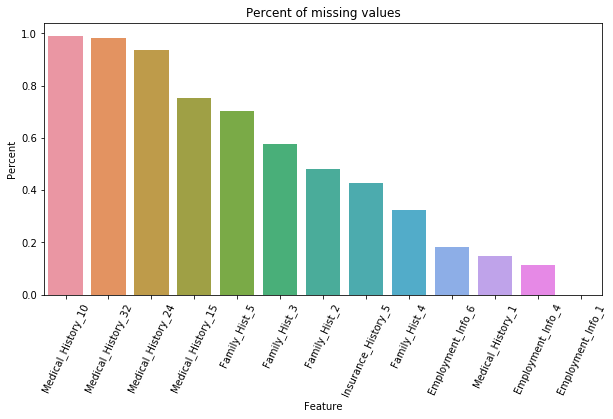

In [16]:
  
name=['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5','Family_Hist_3',
      'Family_Hist_2','Insurance_History_5','Family_Hist_4','Employment_Info_6','Medical_History_1','Employment_Info_4',
      'Employment_Info_1']
percent=[0.990620,0.981358,0.935990,0.751015, 0.704114,0.576632, 0.482579,0.427679,0.323066,0.182786,0.149694,0.114161,0.000320]

plt.figure(figsize=(10,5))
sns.barplot(x=name,y=percent)
plt.xticks(rotation=65)
plt.title('Percent of missing values')
plt.xlabel('Feature')
plt.ylabel('Percent')

## Missing values in percent
## As we can see the features: Medical_History_10,Medical_History_32,Medical_History_24 have the highest percent of missing values. They have almost 100 percent of missing values in the train and the test data set so they will be thrown away.
## The variables: Medical_History_15,Family_Hist_5,Family_Hist_3,Family_Hist_2,Insurance_History_5,      Family_Hist_4
## Have a significant percent of missing values in the train data set and in the test data set, so they also will be thrown away. 
## But we would not drop the features:Employment_Info_6,Medical_History_1,Employment_Info_4,Employment_Info_1       because they have unsignificant percent of missing values so I will perform on them an imputation by the average of each of them.
## *Note: Rule of thumb: The significant percent of the missing values should be upper than 20%

In [17]:
data.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [18]:
data['Employment_Info_6'].mean()

0.361468804001489

In [19]:
data.loc[data['Employment_Info_6'].isnull(),'Employment_Info_6']=0.36

In [20]:
data['Medical_History_1'].mean()

7.962172225303019

In [21]:
data.loc[data['Medical_History_1'].isnull(),'Medical_History_1']=7.962

In [22]:
data['Employment_Info_4'].mean() 

0.0062826743249304665

In [23]:
data.loc[data['Employment_Info_4'].isnull(),'Employment_Info_4']=0.0063

In [24]:
data['Employment_Info_1'].mean() 

0.07758209953084522

In [25]:
data.loc[data['Employment_Info_1'].isnull(),'Employment_Info_1']=0.07758

In [26]:
datanew=pd.DataFrame.drop(data,labels=['Medical_History_10','Medical_History_32','Medical_History_24',
                                       'Medical_History_15','Family_Hist_5','Family_Hist_3','Family_Hist_2',
                                       'Insurance_History_5','Family_Hist_4'],axis=1)

In [23]:
export_csv =datanew.to_csv (r'C:/Users/miri_b/Desktop/risk_prediction_final project/datanew1.csv', index = None, header=True) 

In [21]:
datanew.head(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.3600,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,4.000,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,5.000,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,10.000,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.000,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,7.962,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [27]:
labelencoder = LabelEncoder()
datanew['Product_Info_2'] = labelencoder.fit_transform(datanew['Product_Info_2'])

In [28]:
cat=datanew['Product_Info_2'].unique()
cat

array([16,  0, 18, 17, 15,  7,  1, 14,  6,  5,  2,  4, 13, 10,  9, 12, 11,
        3,  8], dtype=int64)

In [29]:
datanew.head(3) 

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.3600,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


#  <font color='red' > <center> EDA:Exploratory Data Analysis <center> </font>

## Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

#  <font color='red' > <center> Some Univariate Distributions <center> </font>

##  <font color='green' > <center> Distribution of the Response variable <center> </font>


C:\Users\miri_b\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Response in Percent')

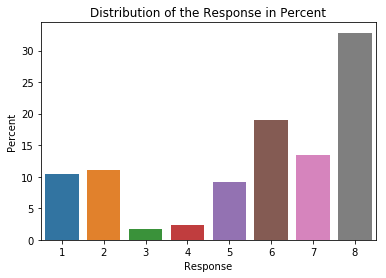

In [27]:
ax = sns.barplot(x='Response', y='Response', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel='Percent')
plt.title('Distribution of the Response in Percent')

##  <font color='green' > <center>  Distribution of Age  <center> </font>

Text(0.5, 0, 'Normalized Age')

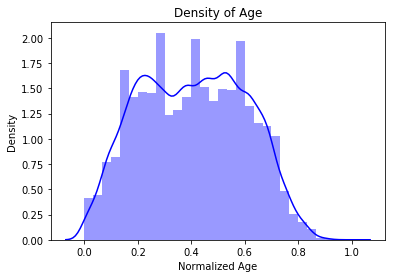

In [28]:
sns.distplot(data['Ins_Age'] ,color="b",bins=30)
plt.title('Density of Age')
plt.ylabel('Density')
plt.xlabel('Normalized Age')


##  <font color='green' > <center>  Distribution of Height  <center> </font>

Text(0, 0.5, 'Density')

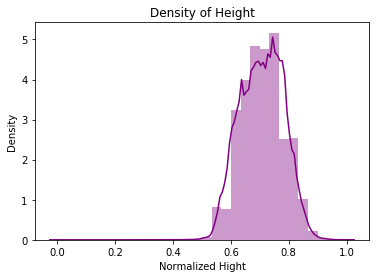

In [29]:
sns.distplot(data['Ht'] ,color="purple",bins=30)
plt.title('Density of Height')
plt.xlabel('Normalized Hight')
plt.ylabel('Density')

##  <font color='green' > <center>  Distribution of Weight  <center> </font>

Text(0, 0.5, 'Density')

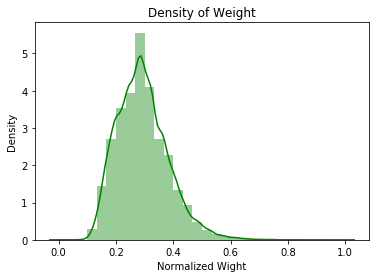

In [30]:
sns.distplot(data['Wt'] ,color="green",bins=30)
plt.title('Density of Weight')
plt.xlabel('Normalized Wight')
plt.ylabel('Density')


##  <font color='green' > <center>  Distribution of BMI  <center> </font>

Text(0, 0.5, 'Density')

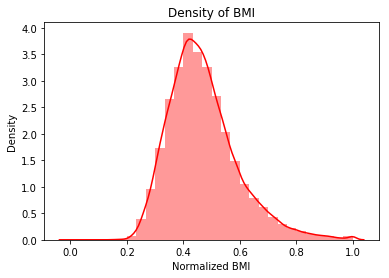

In [31]:
sns.distplot(data['BMI'] ,color="red",bins=30)
plt.title('Density of BMI')
plt.xlabel('Normalized BMI')
plt.ylabel('Density')

#  <font color='red' > <center> Multiple Plots <center> </font>

##  <font color='green' > <center> Employment Info 1 v.s Response <center> </font>

Text(0, 0.5, 'InsuredInfo_1')

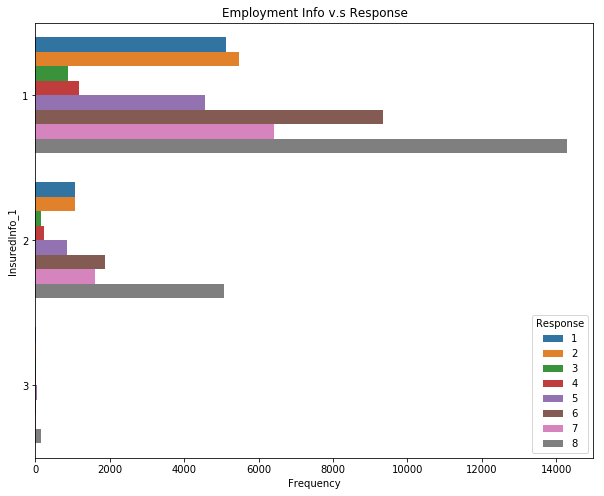

In [32]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_1', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment Info v.s Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_1')


##  <font color='green' > <center>  Employment Info 2 v.s Response  <center> </font>

Text(0, 0.5, 'InsuredInfo_2')

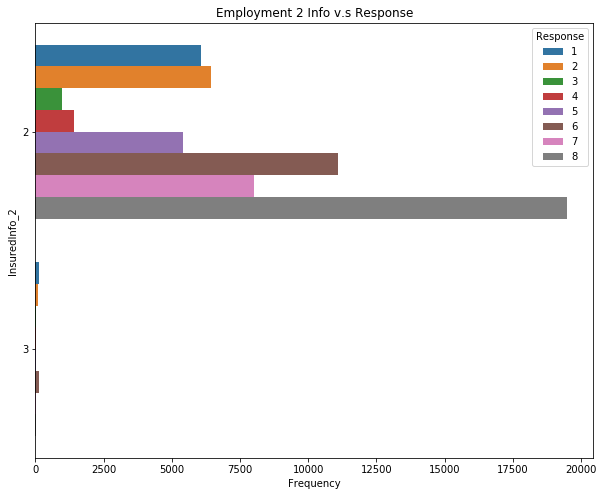

In [33]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_2', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment 2 Info v.s Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_2')


##  <font color='green' > <center>  Employment Info 3 v.s Response  <center> </font>

Text(0.5, 0, 'InsuredInfo_3')

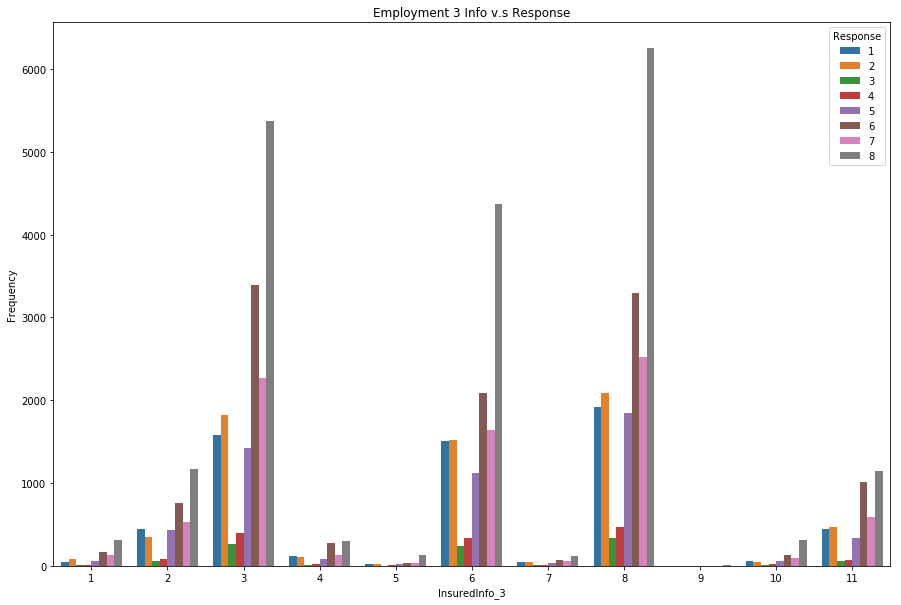

In [34]:
plt.subplots(1,1,figsize=(15,10))

sns.countplot(x='InsuredInfo_3', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment 3 Info v.s Response')
plt.ylabel('Frequency')
plt.xlabel('InsuredInfo_3')


##  <font color='green' > <center>   Employment Info 4 v.s Response  <center> </font>

Text(0, 0.5, 'InsuredInfo_4')

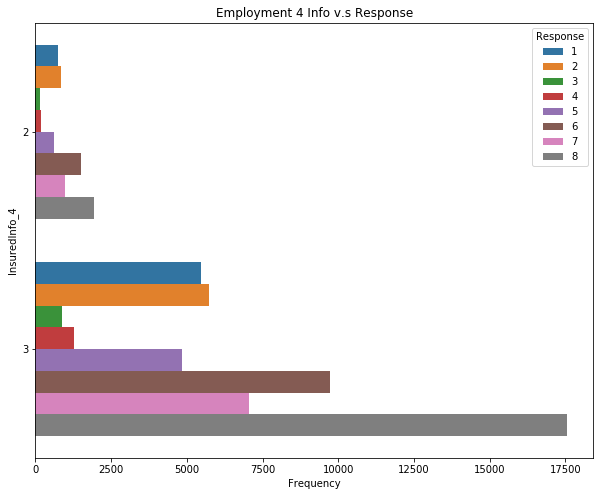

In [35]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_4', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment 4 Info v.s Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_4')



##  <font color='green' > <center>  Employment Info 5 v.s Response  <center> </font>

Text(0, 0.5, 'InsuredInfo_5')

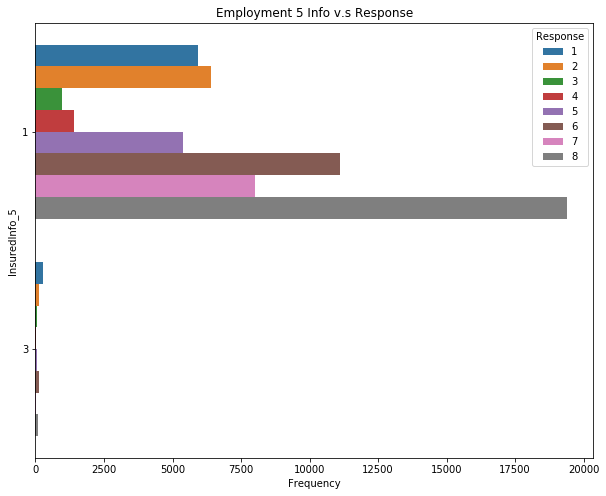

In [36]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_5', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment 5 Info v.s Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_5')



##  <font color='green' > <center>  Employment Info 6 v.s Response  <center> </font>

Text(0, 0.5, 'InsuredInfo_6')

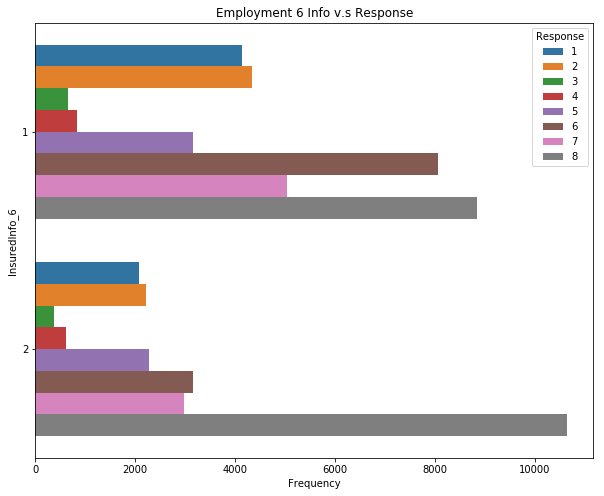

In [37]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_6', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])

plt.title('Employment 6 Info v.s Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_6')


##  <font color='green' > <center>    Response v.s BMI  <center> </font>

Text(0.5, 1.0, 'BMI v.s Response')

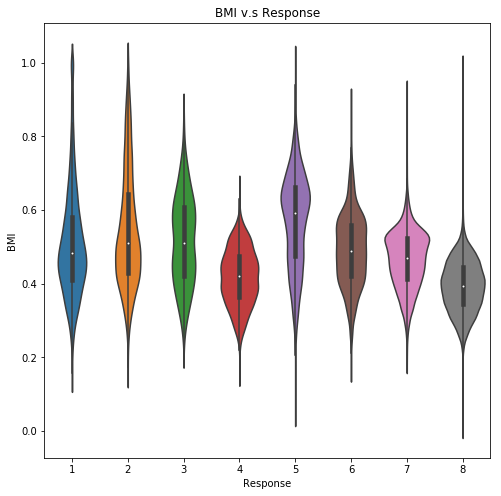

In [38]:
plt.subplots(1,1,figsize=(8,8))
sns.violinplot(x='Response', y='BMI', data=data, 
                 order=[1,2,3,4,5,6,7,8])
plt.title('BMI v.s Response')

##  <font color='green' > <center>  Response v.s Age  <center> </font>

Text(0.5, 1.0, 'Age v.s Response')

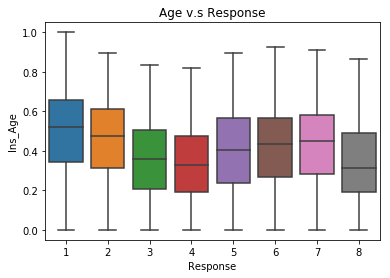

In [39]:
sns.boxplot(x='Response', y='Ins_Age', data=data, 
                 order=[1,2,3,4,5,6,7,8])
plt.title('Age v.s Response')

##  <font color='green' > <center>  Response v.s Product_Info_2  <center> </font>

In [40]:
labelencoder = LabelEncoder()
data['Product_Info_2'] = labelencoder.fit_transform(data['Product_Info_2'])

Text(0.5, 0, 'Product_Info_2')

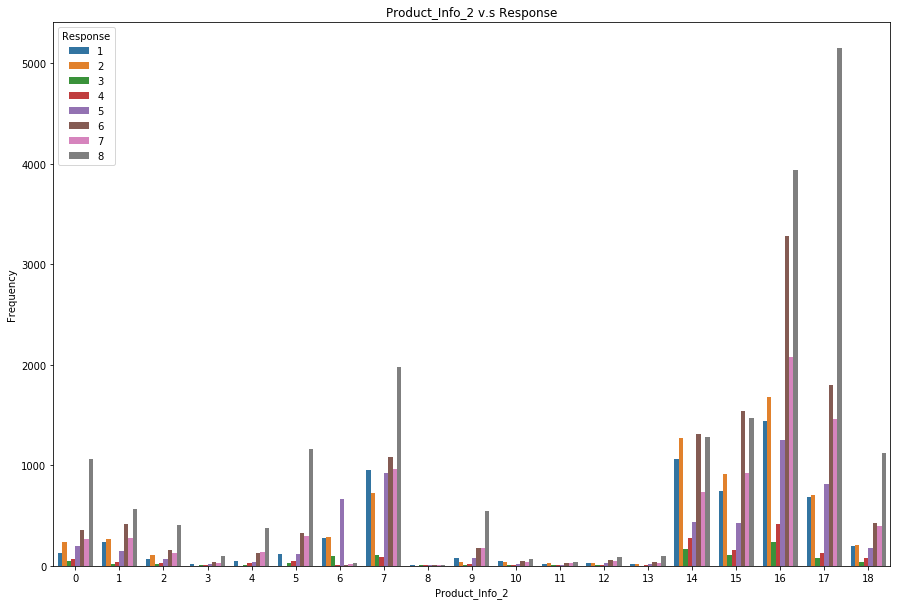

In [41]:
plt.subplots(1,1,figsize=(15,10))
sns.countplot(x='Product_Info_2', hue='Response', data=data, 
               hue_order=[1,2,3,4,5,6,7,8])
plt.title('Product_Info_2 v.s Response')
plt.ylabel('Frequency')
plt.xlabel('Product_Info_2')


#  <font color='Red' > <center> For simplifying the problem, I will turn the Response feature  into binary feature where 1-4 will be the low level of risk and 5-8 will be the high level of risk. (1 will be high level and 0 low level) <center> </font>



In [25]:
datanew['Response'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1},inplace=True)

In [26]:
datanew['Response'].unique()

array([1, 0], dtype=int64)

##  <font color='green' > <center>    Distribution of the binary Response <center> </font>

C:\Users\miri_b\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of the Response in Percent')

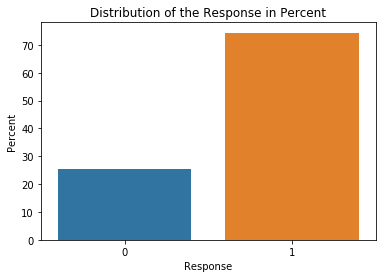

In [28]:
ax = sns.barplot(x='Response', y='Response', data=datanew, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel='Percent')
plt.title('Distribution of the Response in Percent')

##  <font color='green' > <center>   Binary Response v.s BMI  <center> </font>

Text(0.5, 1.0, 'BMI v.s Response')

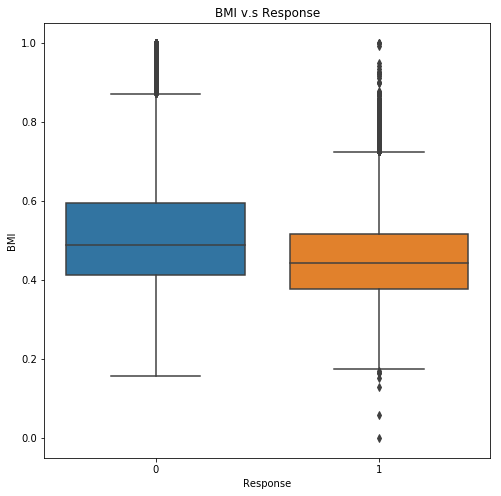

In [34]:
plt.subplots(1,1,figsize=(8,8))
sns.boxplot(x='Response', y='BMI', data=datanew, 
                 order=[0,1])
plt.title('BMI v.s Response')

##  <font color='green' > <center> Binary Response v.s Age  <center> </font>

Text(0.5, 1.0, 'Age v.s Binary Response')

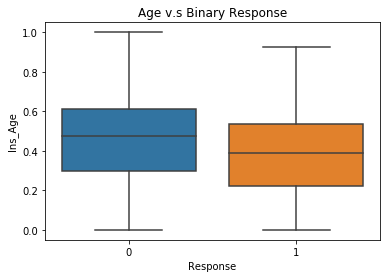

In [43]:
sns.boxplot(x='Response', y='Ins_Age', data=datanew, 
                 order=[0,1])
plt.title('Age v.s Binary Response')

##  <font color='green' > <center> Employment Info 1 v.s Binary Response <center> </font>

Text(0, 0.5, 'InsuredInfo_1')

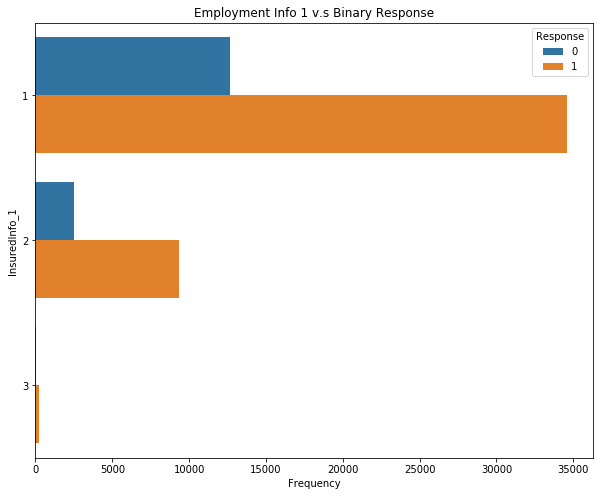

In [38]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_1', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment Info 1 v.s Binary Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_1')

##  <font color='green' > <center> Employment Info 2 v.s Binary Response <center> </font>

Text(0, 0.5, 'InsuredInfo_2')

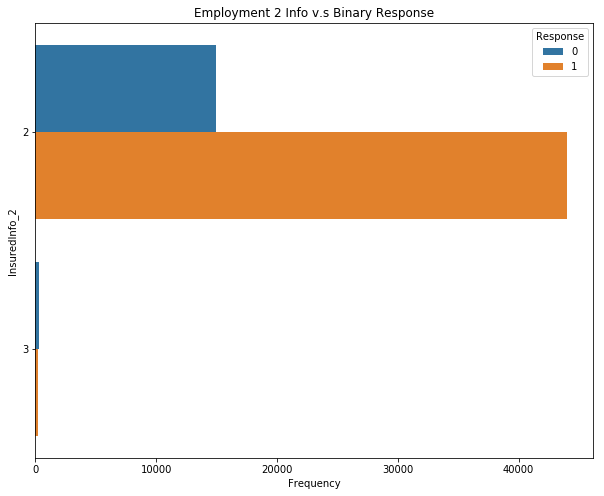

In [44]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_2', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment 2 Info v.s Binary Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_2')

##  <font color='green' > <center> Employment Info 3 v.s Binary Response <center> </font>

Text(0.5, 0, 'InsuredInfo_3')

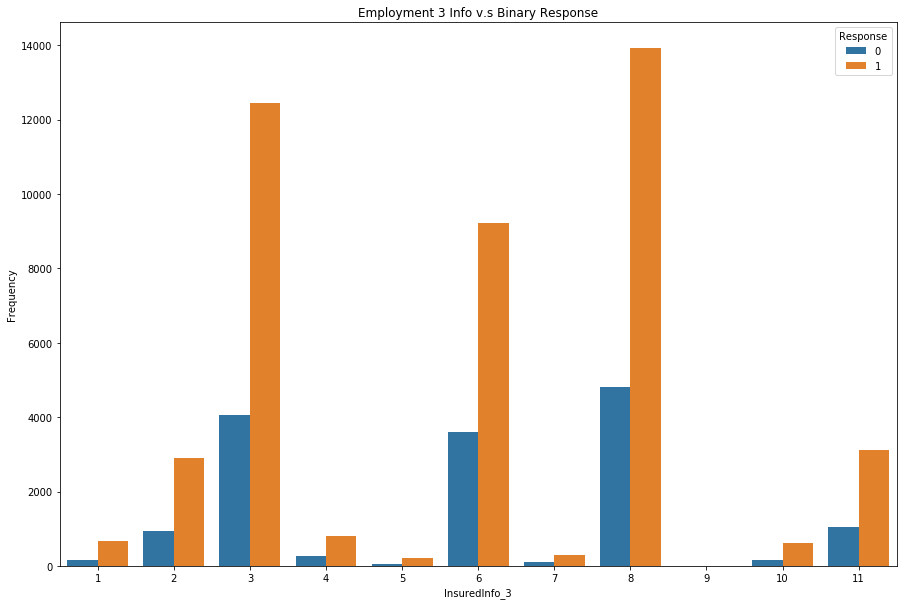

In [47]:
plt.subplots(1,1,figsize=(15,10))

sns.countplot(x='InsuredInfo_3', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment 3 Info v.s Binary Response')
plt.ylabel('Frequency')
plt.xlabel('InsuredInfo_3')

##  <font color='green' > <center> Employment Info 4 v.s Binary Response <center> </font>

Text(0, 0.5, 'InsuredInfo_4')

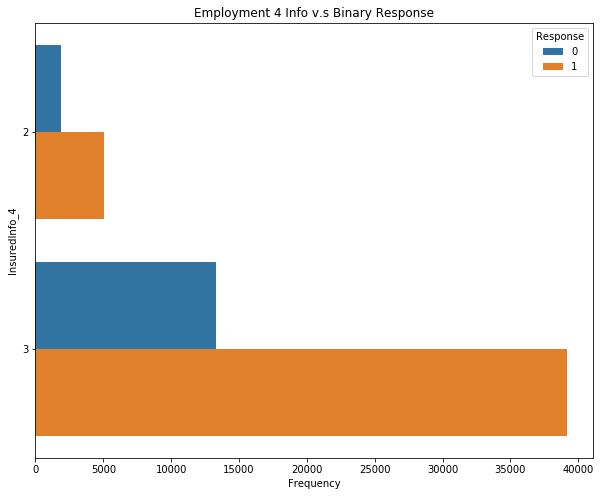

In [48]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_4', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment 4 Info v.s Binary Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_4')

##  <font color='green' > <center> Employment Info 5 v.s Binary Response <center> </font>

Text(0, 0.5, 'InsuredInfo_5')

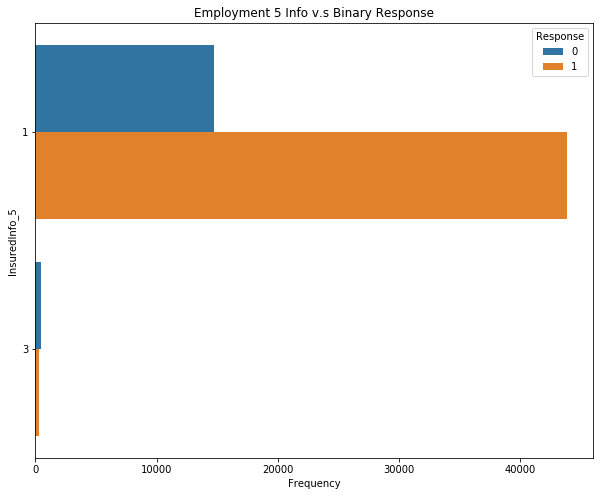

In [49]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_5', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment 5 Info v.s Binary Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_5')


##  <font color='green' > <center> Employment Info 6 v.s Binary Response <center> </font>

Text(0, 0.5, 'InsuredInfo_6')

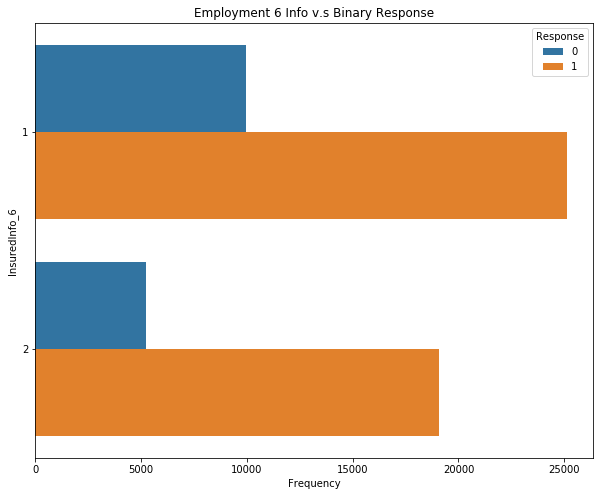

In [50]:
plt.subplots(1,1,figsize=(10,8))

sns.countplot(y='InsuredInfo_6', hue='Response', data=datanew, 
               hue_order=[0,1])

plt.title('Employment 6 Info v.s Binary Response')
plt.xlabel('Frequency')
plt.ylabel('InsuredInfo_6')

##  <font color='green' > <center>  Binary Response v.s Product_Info_2  <center> </font>

In [52]:
labelencoder = LabelEncoder()
datanew['Product_Info_2'] = labelencoder.fit_transform(datanew['Product_Info_2'])

Text(0.5, 0, 'Product_Info_2')

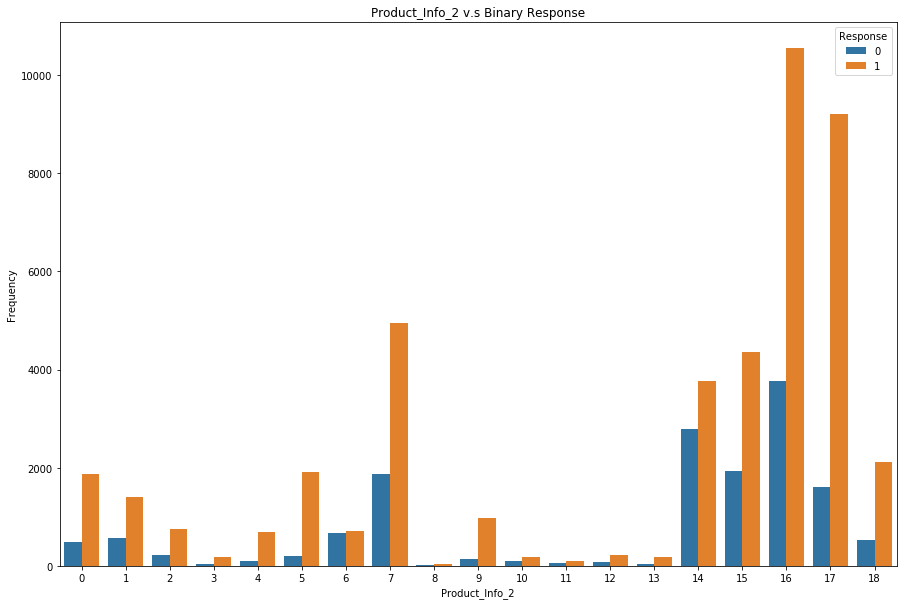

In [53]:
plt.subplots(1,1,figsize=(15,10))
sns.countplot(x='Product_Info_2', hue='Response', data=datanew, 
               hue_order=[0,1])
plt.title('Product_Info_2 v.s Binary Response')
plt.ylabel('Frequency')
plt.xlabel('Product_Info_2')

#  <font color='Red' > <center>  Clasification methods <center> </font>

##  <font color='green' > <center>  Logistic Regression  <center> </font>


In [30]:
labelencoder = LabelEncoder()
datanew['Product_Info_2'] = labelencoder.fit_transform(datanew['Product_Info_2'])
datanew.head(5)
datanew['Product_Info_2'].unique()

array([16,  0, 18, 17, 15,  7,  1, 14,  6,  5,  2,  4, 13, 10,  9, 12, 11,
        3,  8], dtype=int64)

In [31]:
d=datanew.isnull().sum()
d=pd.DataFrame(d)
d=d.T
d

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
datanew.shape
print(datanew.columns.tolist())

['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3', 'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1', 'Medical_History_1', 'Medical_History_2', 'Medical_History_3', 'Medical_History_4', 'Medical_History_5', 'Medical_History_6', 'Medical_History_7', 'Medical_History_8', 'Medical_History_9', 'Medical_History_11', 'Medical_History_12', 'Medical_History_13', 'Medical_History_14', 'Medical_History_16', 'Medical_History_17', 'Medical_History_18', 'Medical_History_19', 'Medical_History_20', 'Medical_History_21', 'Medi

In [33]:
y = datanew['Response']
X = datanew.drop(labels=['Response'],axis=1)

In [34]:
#prediction is on y_train
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=.30,random_state=1)

In [50]:
X_train.shape

(41566, 118)

In [51]:
X_valid.shape

(17815, 118)

In [52]:
y_train.shape

(41566,)

In [53]:
y_valid.shape

(17815,)

In [192]:
X=X_train
y=y_train
clf_logistic = LogisticRegression(solver='lbfgs')
clf_logistic_fit = clf_logistic.fit(X,y)

In [193]:
X_train1=X_train
X_train_pred = clf_logistic.predict(X)

In [194]:
clf_logistic_fit.coef_

array([[-3.20199253e-06,  7.01290815e-03, -3.96181152e-02,
        -6.41798762e-02,  6.51775718e-02,  1.28856830e-02,
        -1.35693214e-02,  6.69852483e-03, -2.81185923e-02,
        -1.91121018e-03, -2.44918242e-02, -3.57439538e-02,
         3.82474124e-03,  2.08708101e-02, -3.26167980e-02,
        -2.62583710e-04,  2.67767345e-02,  1.73307623e-02,
         3.51939858e-02,  3.05664864e-03, -3.84848171e-02,
         2.19579238e-02, -3.02679787e-02,  6.39110127e-02,
        -3.03261070e-02, -7.09081381e-03, -4.58215068e-02,
         5.49990473e-02, -2.32274927e-02, -2.42538401e-02,
         2.18204988e-03, -7.29971734e-03,  4.18496782e-02,
         1.44848994e-02, -9.35003039e-05,  2.37549069e-02,
         1.42812394e-01, -1.73984443e-03,  9.63305867e-02,
         2.03504371e-02,  1.52088146e-03,  2.88448250e-02,
         2.32114916e-02, -1.93564042e-03,  1.24483385e-01,
         2.24695986e-02, -7.29455259e-02,  3.00570323e-02,
        -2.01102865e-02, -5.76178907e-03,  2.45871380e-0

In [195]:
clf_logistic_fit.intercept_

array([0.00586368])

In [196]:
clf_logistic_fit.classes_

array([0, 1], dtype=int64)

In [208]:
probs=pd.DataFrame(clf_logistic.predict_proba(X)).head()
probs

,0,1
0,0.281269,0.718731
1,0.451198,0.548802
2,0.152450,0.847550
3,0.211294,0.788706
4,0.311439,0.688561


In [198]:
cm = confusion_matrix(y_true=y_train,
                      y_pred=X_train_pred)
pd.DataFrame(cm,
             index=clf_logistic_fit.classes_,
             columns=clf_logistic_fit.classes_)

,0,1
0,380,4809
1,172,15006


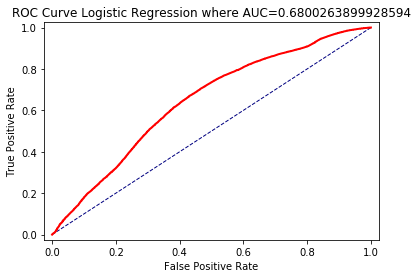

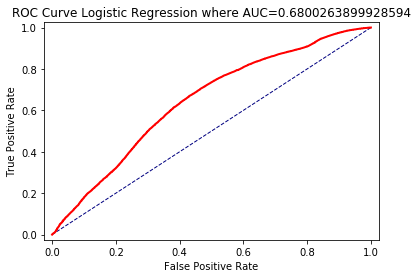

In [246]:
y_pred=clf_logistic.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Logistic Regression'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y,y_pred)

In [186]:
print (classification_report(y_true=y_train,
                            y_pred=X_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.08      0.15      7400
           1       0.76      0.99      0.86     21696

   micro avg       0.76      0.76      0.76     29096
   macro avg       0.72      0.53      0.50     29096
weighted avg       0.74      0.76      0.68     29096



In [142]:
acc=accuracy_score(y_true=y_train,
               y_pred=X_train_pred)
print('Logistic regression accuracy_score',acc)

Logistic regression accuracy_score 0.7503007265553577


## validation

In [247]:
X_valid1=X_valid
X_valid1['prediction'] = clf_logistic.predict(X_valid)

In [250]:
X_valid1.head(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,prediction
36171,48030,1,17,26,0.230769,2,3,1,0.373134,0.745455,0.309623,0.462686,0.061,12,1,0.0000,2,0.25,1,2,11,3,1,1,1,2,1,1,3,3,2,3,3,4.000,3,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,1,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34645,46020,1,15,26,0.487179,2,1,1,0.507463,0.800000,0.424686,0.582295,0.200,1,3,0.0120,2,0.90,1,2,6,3,1,1,1,1,1,3,2,1,1,2,3,6.000,515,2,1,1,3,2,3,1,3,2,3,3,3,3,1,1,2,1,2,3,2,2,3,1,3,2,3,1,3,1,3,1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12768,16951,1,17,26,1.000000,2,3,1,0.223881,0.745455,0.288703,0.428780,0.028,3,1,0.0063,2,1.00,1,2,3,3,1,1,1,2,1,1,3,3,2,3,3,7.962,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26273,34981,1,0,26,0.164103,2,1,1,0.626866,0.763636,0.372385,0.543540,0.052,9,1,0.0000,2,0.36,1,2,8,3,1,1,1,1,1,3,1,2,1,2,3,1.000,373,3,2,1,3,2,2,1,3,2,3,3,1,2,1,1,2,1,2,1,1,3,3,2,1,2,3,3,3,1,2,2,1,1,3,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25220,33593,1,16,26,0.743590,2,3,1,0.253731,0.763636,0.372385,0.543540,0.058,9,1,0.0000,2,0.25,1,2,6,3,1,1,1,2,1,3,2,1,3,2,2,2.000,261,2,2,2,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


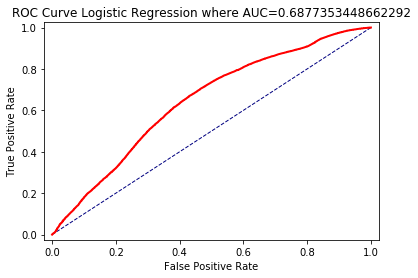

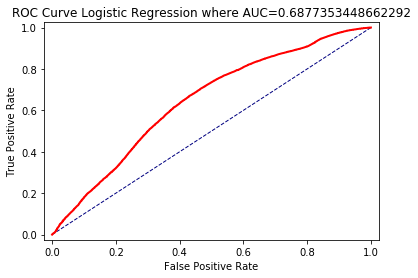

In [253]:
X=X_valid1.drop(labels=['prediction'],axis=1)
y_pred=clf_logistic.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Logistic Regression'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

In [254]:
print (accuracy_score(y_true=y_valid,
                            y_pred=X_valid1['prediction']))

0.755069309199221


##  <font color='green' > <center>  Decision Tree  <center> </font>


In [54]:
print(X_train.shape,X_valid.shape)

(41566, 118) (17815, 118)


In [55]:
print(X_valid.shape,X_train.shape,y_train.shape)

(17815, 118) (41566, 118) (41566,)


In [56]:
#X_valid=X_valid.drop(['prediction'],axis=1)

In [57]:
print(X_valid.shape,X_train.shape,y_train.shape)

(17815, 118) (41566, 118) (41566,)


In [58]:
param_grid={'max_depth':range(1,20,2)}
tree=DecisionTreeClassifier()
clf_tree=GridSearchCV(tree,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)


In [59]:
y_pred=clf_tree.predict(X_valid)

In [60]:
print(accuracy_score(y_valid,y_pred))

0.7746281223687903


In [61]:
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.67      0.27      0.38      4638
           1       0.79      0.95      0.86     13177

   micro avg       0.77      0.77      0.77     17815
   macro avg       0.73      0.61      0.62     17815
weighted avg       0.76      0.77      0.74     17815



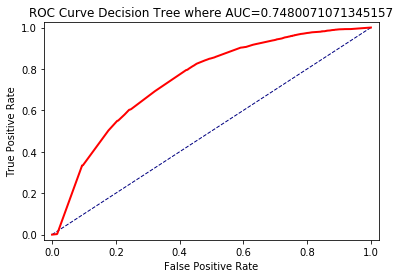

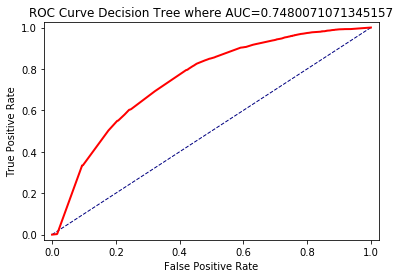

In [75]:
#X=X_valid.drop(labels=['prediction'],axis=1)
X=X_valid
y_pred=clf_tree.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Decision Tree'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center>  KNeighbors Classifier <center> </font>


In [69]:
print(X_train.shape, y_train.shape,X_valid.shape,y_valid.shape)

(41566, 118) (41566,) (17815, 118) (17815,)


In [70]:
kn = KNeighborsClassifier()

In [71]:
clf =kn.fit(X_train,y_train)
y_pred = clf.predict(X_valid)

In [72]:
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.28      0.12      0.17      4638
           1       0.74      0.89      0.81     13177

   micro avg       0.69      0.69      0.69     17815
   macro avg       0.51      0.51      0.49     17815
weighted avg       0.62      0.69      0.64     17815



In [73]:
print(accuracy_score(y_valid,y_pred))

0.6887454392365984


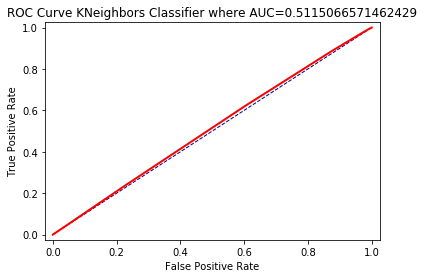

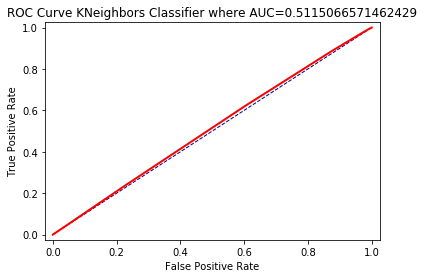

In [76]:
X=X_valid
y_pred=clf.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve KNeighbors Classifier'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center> Naive Bayes <center> </font>

In [79]:
nb = GaussianNB()
clf =nb.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.66      0.12      0.21      4638
           1       0.76      0.98      0.86     13177

   micro avg       0.76      0.76      0.76     17815
   macro avg       0.71      0.55      0.53     17815
weighted avg       0.73      0.76      0.69     17815



In [78]:
print(accuracy_score(y_valid,y_pred))

0.7551501543642998


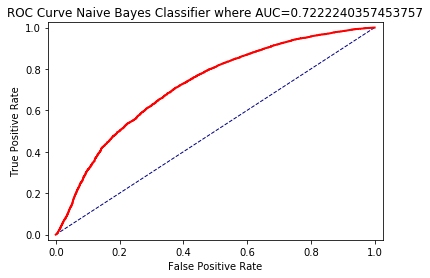

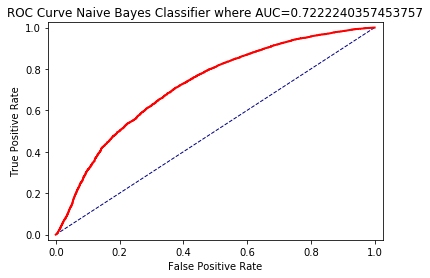

In [80]:
X=X_valid
y_pred=clf.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Naive Bayes Classifier'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center> Discriminant Analysis <center> </font>

In [81]:
qd= QuadraticDiscriminantAnalysis()
clf =qd.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      4638
           1       0.82      0.80      0.81     13177

   micro avg       0.72      0.72      0.72     17815
   macro avg       0.64      0.65      0.64     17815
weighted avg       0.73      0.72      0.72     17815



In [82]:
print(accuracy_score(y_valid,y_pred))

0.7200112264945271


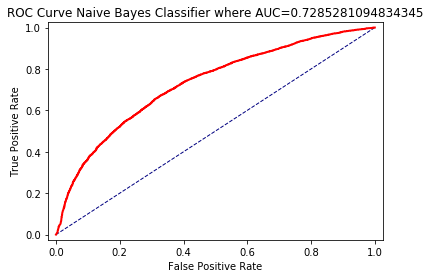

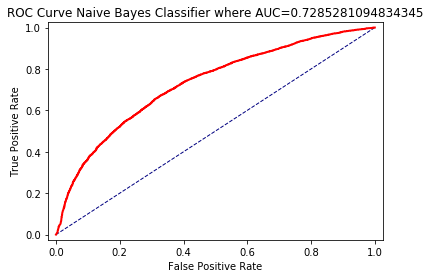

In [83]:
X=X_valid
y_pred=clf.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Naive Bayes Classifier'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

#  <font color='red' > <center> Ensemble methods <center> </font>

##  <font color='green' > <center> Random Forest <center> </font>

In [84]:
print(X_train.shape, y_train.shape,X_valid.shape,y_valid.shape)

(41566, 118) (41566,) (17815, 118) (17815,)


In [85]:
param_grid={'max_depth':range(1,20,2)}
forest=RandomForestClassifier()
random_forest=GridSearchCV(forest,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
y_pred=random_forest.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))


C:\Users\miri_b\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.31      0.43      4638
           1       0.80      0.95      0.86     13177

   micro avg       0.78      0.78      0.78     17815
   macro avg       0.73      0.63      0.65     17815
weighted avg       0.76      0.78      0.75     17815



In [86]:
print(accuracy_score(y_valid,y_pred))

0.7804658995228739


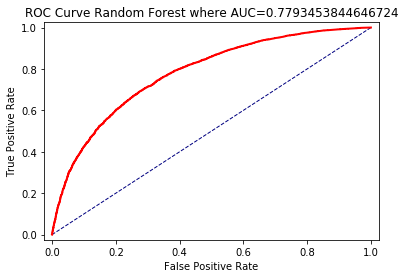

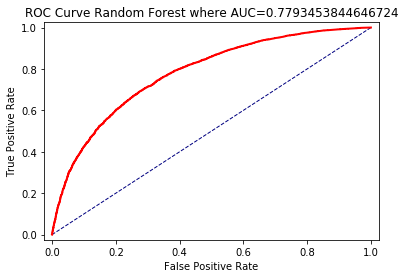

In [92]:
X=X_valid
y_pred=random_forest.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Random Forest'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center> BaggingClassifier <center> </font>

In [106]:
clf_base = DecisionTreeClassifier(max_depth=5)

In [107]:
clf_bagging = BaggingClassifier(base_estimator=clf_base,
                                n_estimators=100)
clf_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [108]:
print (f"DT Bagging classifier:\n \
        \ttrain accuracy: {clf_bagging.score(X_train, y_train):.2f}\n \
        \ttest accuracy: {clf_bagging.score(X_valid, y_valid):.2f}")


DT Bagging classifier:
         	train accuracy: 0.79
         	test accuracy: 0.78


In [109]:
y_pred= clf_bagging.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))
print(accuracy_score(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.24      0.36      4638
           1       0.78      0.97      0.87     13177

   micro avg       0.78      0.78      0.78     17815
   macro avg       0.76      0.60      0.61     17815
weighted avg       0.77      0.78      0.73     17815

0.7788941902890822


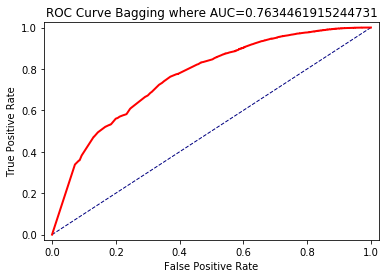

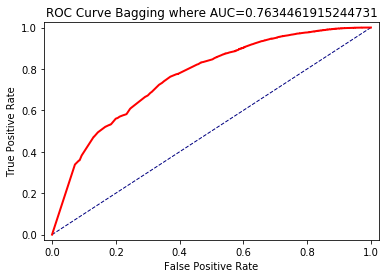

In [120]:
X=X_valid
y_pred=clf_bagging.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Bagging'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='red' > <center> Boosting <center> </font>


##  <font color='green' > <center> AdaBoostClassifier <center> </font>

In [111]:
clf_base = DecisionTreeClassifier(max_depth=3)

In [112]:
clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [113]:
print (f"DT ADA boosting classifier:\n \
\ttrain accuracy: {clf_adaboost.score(X_train, y_train):.2f}\n \
\ttest accuracy: {clf_adaboost.score(X_valid, y_valid):.2f}")

DT ADA boosting classifier:
 	train accuracy: 0.78
 	test accuracy: 0.78


In [114]:
y_pred= clf_adaboost.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))
print(accuracy_score(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.20      0.32      4638
           1       0.78      0.98      0.87     13177

   micro avg       0.78      0.78      0.78     17815
   macro avg       0.77      0.59      0.59     17815
weighted avg       0.78      0.78      0.72     17815

0.7764804939657592


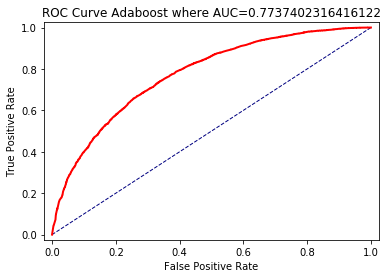

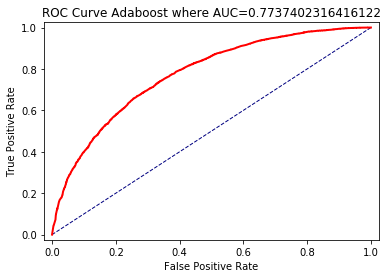

In [119]:
X=X_valid
y_pred=clf_adaboost.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Adaboost'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center> GradientBoostingClassifier <center> </font> 

In [116]:
clf_GB = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.01)
clf_GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [117]:
print (f"DT gradient boosting classifier:\n \
    \ttrain accuracy: {clf_GB.score(X_train, y_train):.2f}\n \
    \ttest accuracy: {clf_GB.score(X_valid, y_valid):.2f}")

DT gradient boosting classifier:
     	train accuracy: 0.78
     	test accuracy: 0.77


In [118]:
y_pred= clf_GB.predict(X_valid)
print(classification_report(y_true=y_valid, y_pred=y_pred))
print(accuracy_score(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.19      0.30      4638
           1       0.77      0.98      0.87     13177

   micro avg       0.77      0.77      0.77     17815
   macro avg       0.78      0.58      0.58     17815
weighted avg       0.77      0.77      0.72     17815

0.7743474600056133


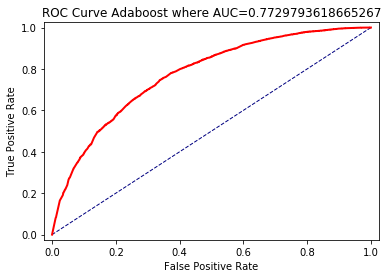

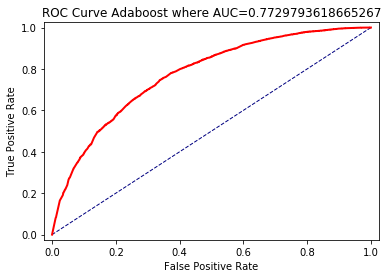

In [121]:
X=X_valid
y_pred=clf_GB.predict_proba(X)[::,1]
def plot_roc_curve(true_y,y_pred):
    from sklearn.metrics import roc_curve
    fpr, tpr,threshold= roc_curve(true_y,y_pred)
    fig = plt.figure()
    auc = metrics.roc_auc_score(true_y,y_pred)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr, tpr, color='red', lw=2)
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Adaboost'+' '+'where'+' '+'AUC='+str(auc))
   
    return fig

plot_roc_curve(y_valid,y_pred)

##  <font color='green' > <center> Comparicon of the machine learning clasification methods <center> </font> 

Text(0, 0.5, 'Accuracy')

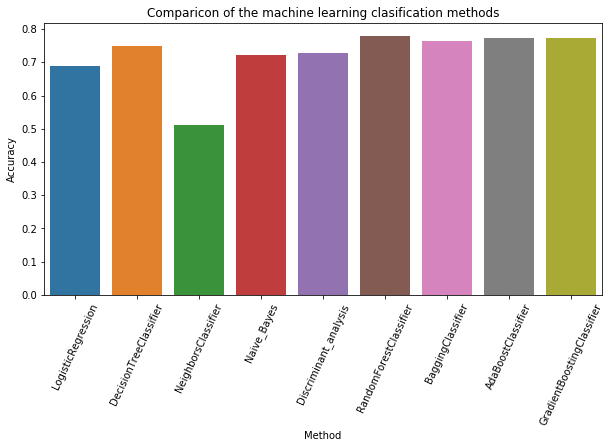

In [6]:
  
name=[ 'LogisticRegression','DecisionTreeClassifier','NeighborsClassifier','Naive_Bayes','Discriminant_analysis','RandomForestClassifier',
      'BaggingClassifier','AdaBoostClassifier','GradientBoostingClassifier']
auc=[0.75,0.774,0.68,0.75,0.72,0.78,0.778,0.776,0.774]

plt.figure(figsize=(10,5))
sns.barplot(x=name,y=accuracy)
plt.xticks(rotation=65)
plt.title('Comparicon of the machine learning clasification methods')
plt.xlabel('Method')
plt.ylabel('Accuracy')

# In conclusion as it seen the classifier with the highest Accuracy is Random Forest. Other classifiers with high Accuracy are Bagging Classifier,Adaboost Classifier,Gradient Boosting Classifier.
